# (Quick) Python introduction and horizon mask effect

<table>
  <tr>
    <td><img src="logos/CSTB_logo.jpg" width="200" />
    <td><img src="logos/Heliocity_logo.png" width="200" /> 
    <td><img src="logos/USMB_logo_horizontal.png" width="200" />
  </tr>
</table>

<sub>Author: Alexandre MATHIEU, Phd Student, in collaboration Heliocity / CSTB / USMB (LOCIE). </sub>
<sub>Phd thesis: Methodology development to guarantee building photovoltaic systems' performance including failure modelling</sub>


This notebook introduces how to use python to explore data and calculate the effect of shading with the horizon mask from PVGIS.

It is broken down into two parts:

1. **Python introduction**: The student will follow the python introduction and is invited to execute the cells.
2. **Horizon mask effect**: The student is invited to apply the effect of shading on the horizon mask.

The attendees are very much welcome to modify and create/execute some new notebook cells to explore data and try out new methods.

**Make sure to manually execute the cells (ctrl + enter) yourself one by one**

The students are expected to do the <span style="color: red"> exercices </span> in red.

# 1. Python introduction

In [1]:
# Import open source libraries to browse through the data folder and get our satellite data file
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Change the directory path to import functions from local modules
if not 'workbookDir' in globals():
    workbookDir = Path(os.getcwd()).parent
print('Work directory: ' + str(workbookDir))
os.chdir(workbookDir)

from src.config import DATA_PATH # Directory ROOT path

Work directory: C:\Users\MATHIEU\OneDrive - CSTBGroup\Bureau\Code\pvfault_detection_solar_academy


In [2]:
# Load satellite CAMs irradiance data
weather_data = pd.read_csv(DATA_PATH / "sat_data.csv", index_col=0)

weather_data.index = pd.to_datetime(weather_data.index).tz_convert("Europe/Paris")  # Convert the index to a datetime index and assign it to local time

print(weather_data.dropna().head(5))  # Show the first 5 lines, (all in W/m2)

                           ghi  dhi  dni
2022-01-01 01:00:00+01:00  0.0  0.0  0.0
2022-01-01 02:00:00+01:00  0.0  0.0  0.0
2022-01-01 03:00:00+01:00  0.0  0.0  0.0
2022-01-01 04:00:00+01:00  0.0  0.0  0.0
2022-01-01 05:00:00+01:00  0.0  0.0  0.0


# 1.1 Pandas Filtering

When it comes to make calculations faster or select a specific chunk of the DataFrame, filtering can be usefull

                                ghi       dhi       dni
2022-01-01 10:00:00+01:00  150.5869   61.0075  471.0327
2022-01-01 11:00:00+01:00  248.1986   63.4317  677.5654
2022-01-01 12:00:00+01:00  281.0088   84.9074  633.1003
2022-01-01 13:00:00+01:00  288.8650   67.8544  723.7922
2022-01-01 14:00:00+01:00  225.3259   70.7458  596.6607
...                             ...       ...       ...
2022-12-29 15:00:00+01:00  121.7313   64.2177  327.8066
2022-12-30 13:00:00+01:00  112.1809  109.6016    8.7161
2022-12-31 12:00:00+01:00  217.0507  150.5710  216.7422
2022-12-31 13:00:00+01:00  193.7134  161.4488  106.0832
2022-12-31 14:00:00+01:00  148.3794  138.0295   39.0728

[3190 rows x 3 columns]


<AxesSubplot:>

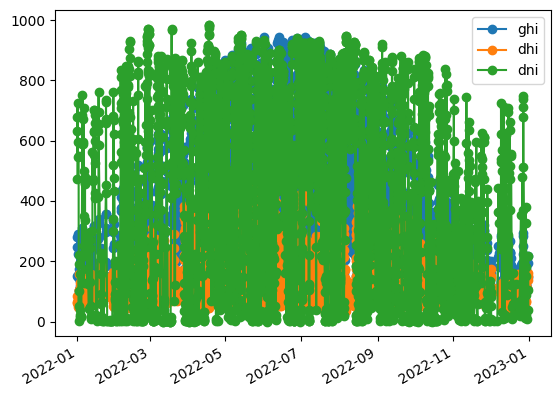

In [3]:
# Filter the dataframe when ghi is over a threshold
filter = weather_data["ghi"] > 100

print(weather_data.loc[filter])

# Plot it
weather_data.loc[filter].plot(marker="o")# Add markers

<AxesSubplot:>

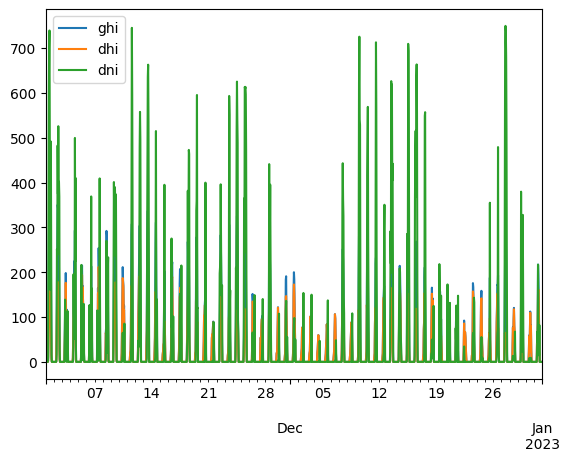

In [4]:
# Sometimes we don't see much about the data and it can be interesting to filter on some dates
filter_date = weather_data.index > pd.to_datetime("2022-11-01").tz_localize("CET") # Filter after the 1st of November
weather_data.loc[filter_date].plot()

<AxesSubplot:>

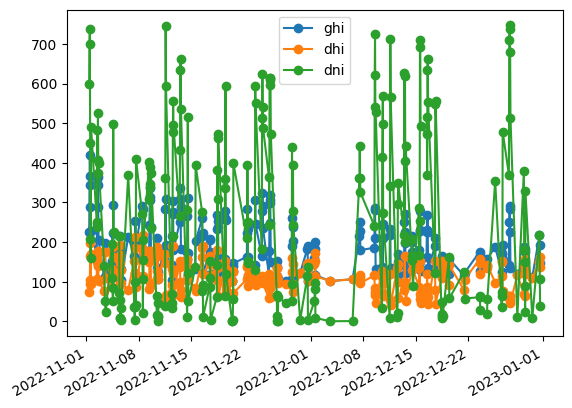

In [5]:
# The filters can add up
filter_all = filter | filter_date # or
filter_all2 = filter & filter_date # or
weather_data.loc[filter_all2].plot(marker="o")

In [6]:
# Note that only one column can also be selected with a filter and the loc command
print(weather_data.loc[filter_all2, "ghi"].head(5))

2022-11-01 09:00:00+01:00    226.2636
2022-11-01 10:00:00+01:00    343.7006
2022-11-01 11:00:00+01:00    418.7252
2022-11-01 12:00:00+01:00    365.9074
2022-11-01 13:00:00+01:00    288.3209
Name: ghi, dtype: float64


## <span style="color: red"> Exercice </span>

Apply the following filters on weather_data with the condition "or":

- ghi > 800 W/m2
- between the 1st of July and the 1st of August

And plot dhi only

In [7]:
#
filter_1 = #
filter_2 = #

SyntaxError: invalid syntax (1725084335.py, line 2)

# 1.2. If and loops

In [8]:
# "If" allows to execute the next row (with a tabulation to the right) if the assertion is True
a=1
if a<0: # assertion: is "a" under 0 ?
    print("a is less than 0") # Line non executed since the assertion above is wrong

In [9]:
if a>0:
    print("a is more than 0") # Line  executed since the assertion above is right

a is more than 0


In [10]:
# Sometimes operations can not be applied directly with pd.Series and loops allow to go through each element of a list or serie
my_list = ["element 1","element 2"]
for element in my_list:
    print(element)

element 1
element 2


In [11]:
# It can be applied to pd.Series
ts = pd.Series([1,2,3])
for element in ts:
    print(element**2)

1
4
9


In [12]:
# For dataFrame, one can use the "iterrows" method
df = pd.DataFrame()
df["column1"] = [1,2,3]
df["column2"] = [1, 3, 5]
print(df)

   column1  column2
0        1        1
1        2        3
2        3        5


In [13]:
ts_stock = pd.Series(dtype=float) # Prepare the recipient to store the values

for index, row in df.iterrows(): # Loop over all rows of the dataframe one by one
    print(row["column1"] + row["column2"])
    ts_stock.loc[index] = row["column1"] + row["column2"]

2
5
8


In [14]:
print(ts_stock)

0    2
1    5
2    8
dtype: int64


## <span style="color: red"> Exercice </span>

Create a new pd.Serie timeserie from df which have the same rows and has a 1 in its row value if the sum over the df row is greater than 4, otherwise, assign 0

In [15]:
ts_stock = # Complete here




SyntaxError: invalid syntax (216403635.py, line 1)

# 1.3. Plots

Text(0.5, 1.0, 'My title')

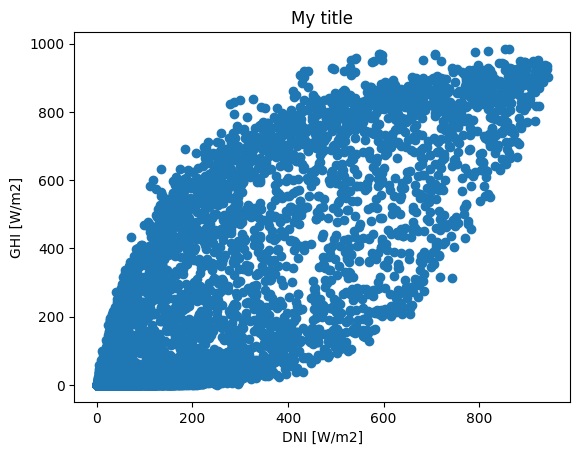

In [16]:
# Here is an example about how to make a plot with the matplotlib.pyplot library
plt.plot(weather_data["ghi"], weather_data["dni"], linewidth=0, marker="o")

plt.ylabel('GHI [W/m2]')
plt.xlabel('DNI [W/m2]')
plt.title("My title")

## 2.1 Mask Horizon effect

In [17]:
# Indicate the full csv-file path
file = r"C:\...horizon.csv"
file = r"C:\Users\MATHIEU\Downloads\horizon_45.181_5.714.csv"

In [18]:
# Import the file into a pandas DataFrame  (skip some rows and add some arguments to make the dataframe clean))
data = pd.read_csv(file, sep='\t', skiprows=3, skipfooter=8, engine="python").dropna(axis=1)

data = data[["A", "H_hor"]]
data.columns = ["azimuth", "elevation"]
data.head()

,azimuth,elevation
0,-180.0,7.6
1,-172.5,6.1
2,-165.0,7.6
3,-157.5,8.8
4,-150.0,8.4


## <span style="color: red"> Exercice </span>

a. Plot the elevation as function of the azimuth with matplotlib

In [19]:
import matplotlib.pyplot as plt
# Complete here to plot the figure

b. Apply the shading effect on the direct POA component, ie if the sun elevation is under the horizon line, POAb = 0 W/m2

(you might want to create a loop)

In [20]:
filter_shading = #

SyntaxError: invalid syntax (2153316002.py, line 1)